In [7]:
# import essential packages I believe will be useful later

import pandas as pd 
import numpy as np
import matplotlib
from matplotlib import pylab as plt

In [8]:
# read in the data, fill in empty cells with NaN

df = pd.read_csv("../data//winemag-data_first150k.csv",  na_values="")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [9]:
# rename the column without a name 

df.rename(columns={'Unnamed: 0':'wine index'}, inplace=True )
df.head()

,wine index,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [10]:
# check the number of rows and columns

print('rows:' , df.shape[0])
print('columns:' , df.shape[1])

rows: 150930
columns: 11


In [11]:
# check the data types of each feature

for i in range(len(df.columns)):
    print(f'{df.columns[i]} {df.dtypes[i]}')

wine index int64
country object
description object
designation object
points int64
price float64
province object
region_1 object
region_2 object
variety object
winery object


In [12]:
# Index already exist so I removed the wine index

df.drop(columns=['wine index'], inplace=True)
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [13]:
# I am dropping the description column. There are well over 150k wine reviews and after sifting through the first 100
# there is no consistent term/phrase that sommeliers use to describe good vs bad wines. Each desciption is too unique
# that is to say that the desciptions are so subjective that I would not have enough time/resources to convert descpitions 
# into good, neutral or bad.

df.drop(columns=['description'], inplace=True)
df.head()

,country,designation,points,price,province,region_1,region_2,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [14]:
# Sometimes there are more specific regions specified within a larger wine growing region (i.e. Rutherford inside Napa 
# Valley). Not every region has a smaller region within, which leaves >61% of the data null. Therefore, region_1 is 
# sufficient in being the only column of interest in terms of region

df.drop(columns=['region_2'], inplace=True)
df.head()

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


In [15]:
# After preprocessing I realized it takes too much space OneHotEncode 'designation' and 'winery'

df.drop(columns=['designation'], inplace=True)
df.head()

,country,points,price,province,region_1,variety,winery
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


In [16]:
df.drop(columns=['winery'], inplace=True)
df.head()

,country,points,price,province,region_1,variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
4,France,95,66.0,Provence,Bandol,Provence red blend


In [17]:
print('columns:' , df.shape[1])

columns: 6


In [18]:
# check how many null values in a column


a = df['country'].isna().sum()
b = df['points'].isna().sum()
c = df['price'].isna().sum()
d = df['province'].isna().sum()
e = df['region_1'].isna().sum()
f = df['variety'].isna().sum()

print("Missing countries count:", a)
print("Missing points count:", b)
print("Missing price count:", c)
print("Missing province count:", d)
print("Missing region_1 count:", e)
print("Missing variety count:", f)

Missing countries count: 5
Missing points count: 0
Missing price count: 13695
Missing province count: 5
Missing region_1 count: 25060
Missing variety count: 0


In [19]:
# The five rows missing country are the same 5 rows missing province as well as designation, price and province
#Dropping 5 rows is equivalent to dropping 5/150930=0.00003312794 of the data set

dropped = df.dropna(axis = 0, subset = ['country', 'province'])
print('rows:' , dropped.shape[0])
dropped.head()

rows: 150925


,country,points,price,province,region_1,variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
4,France,95,66.0,Provence,Bandol,Provence red blend


In [20]:
# check how many null values in a column


#check how many null values in a column


a = dropped['country'].isna().sum()
b = dropped['points'].isna().sum()
c = dropped['price'].isna().sum()
d = dropped['province'].isna().sum()
e = dropped['region_1'].isna().sum()
f = dropped['variety'].isna().sum()

print("Missing countries count:", a)
print("Missing points count:", b)
print("Missing price count:", c)
print("Missing province count:", d)
print("Missing region_1 count:", e)
print("Missing variety count:", f)

Missing countries count: 0
Missing points count: 0
Missing price count: 13695
Missing province count: 0
Missing region_1 count: 25055
Missing variety count: 0


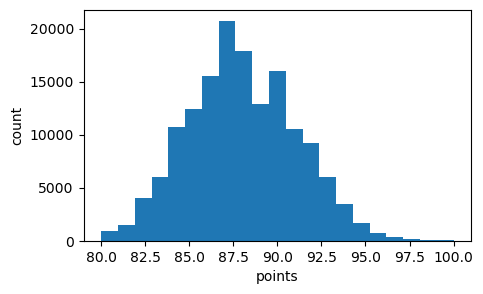

In [21]:
plt.figure(figsize=(5,3))
dropped['points'].plot.hist(bins = dropped['points'].nunique())                
plt.xlabel('points')
plt.ylabel('count')
plt.savefig("../Figures/")
plt.show()

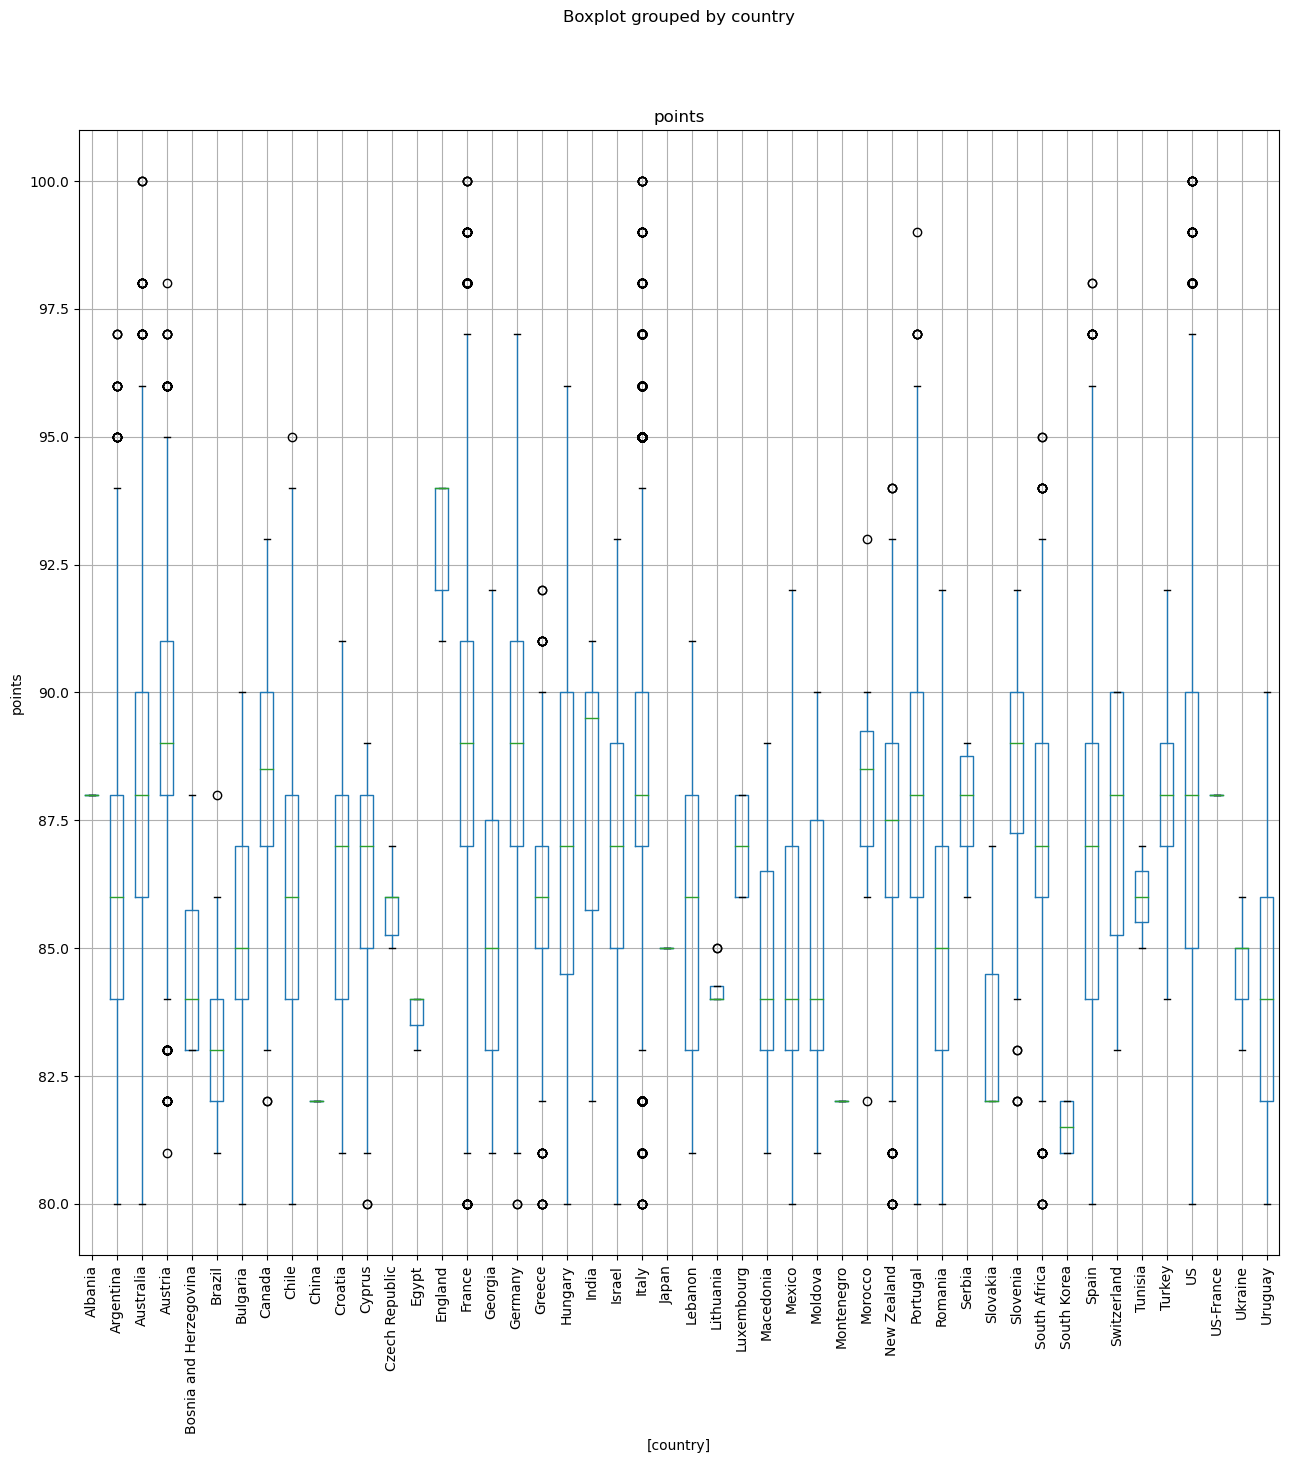

In [22]:
# country vs points (categorical vs continuous)

dropped[['points','country']].boxplot(by='country', figsize = (15,15))
plt.ylabel('points')
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

rows: 137230


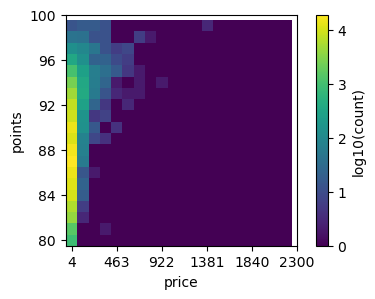

In [23]:
# price vs points (continuous vs continuous)

for_graph = dropped.dropna(axis = 0, subset = ['price'])
print('rows:' , for_graph.shape[0])
dropped.head()

nbins = 20

heatmap, xedges, yedges = np.histogram2d(for_graph['price'], for_graph['points'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

heatmap[heatmap == 0] = 0.1 
plt.figure(figsize=(5,3))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) 
plt.xlabel('price')
plt.ylabel('points')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

<Figure size 500x300 with 0 Axes>

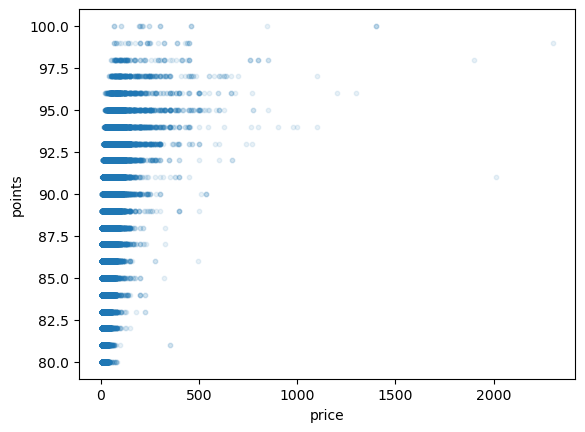

In [24]:
plt.figure(figsize=(5,3))
dropped.plot.scatter('price','points', s=10, alpha=0.1) 
plt.show()

<Figure size 500x300 with 0 Axes>

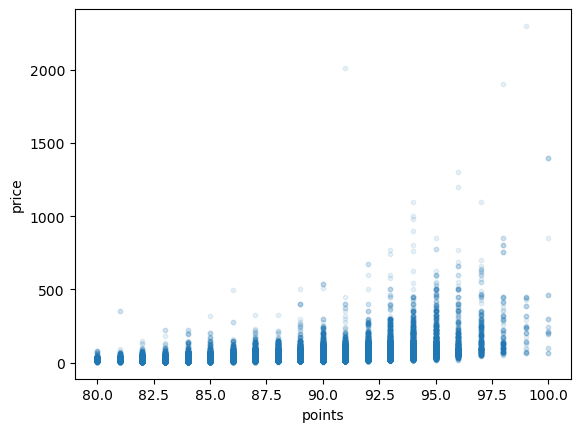

In [25]:
plt.figure(figsize=(5,3))
dropped.plot.scatter('points','price', s=10, alpha=0.1) 
plt.show()

C:\Users\Michelle\AppData\Local\Temp\ipykernel_12436\93658919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['price_category'] = np.where(dropped['price'] <= 24, '<=24', '>24')


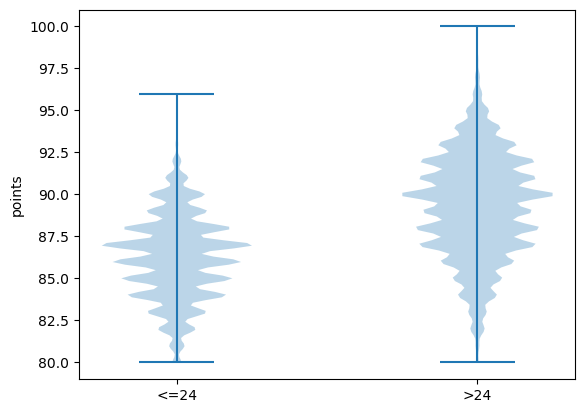

C:\Users\Michelle\AppData\Local\Temp\ipykernel_12436\93658919.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped.drop(columns=['price_category'], inplace=True, axis = 1)


,country,points,price,province,region_1,variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
4,France,95,66.0,Provence,Bandol,Provence red blend


In [26]:
np.where(dropped['price'] <= 24, '<=24', '>24')
dropped['price_category'] = np.where(dropped['price'] <= 24, '<=24', '>24')

dataset = [dropped[dropped.loc[:, 'price_category']=='<=24']['points'].values,
           dropped[dropped.loc[:, 'price_category']=='>24']['points'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['<=24','>24'])
plt.ylabel('points')
plt.show()

dropped.drop(columns=['price_category'], inplace=True, axis = 1)
dropped.head()

In [27]:
# My data set has well over 150k rows, therefore it is sufficiently large. As well, the wines are iid


from sklearn.model_selection import train_test_split

random_state = 3
y = dropped['points']
X = dropped.loc[:, dropped.columns != 'points']

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = 0.6, random_state = random_state)

X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size = 0.5, random_state = random_state)

print(X_train.head())
print(X_train.shape)
print("\n")
print("\n")
print("\n")
print(X_val.head())
print(X_val.shape)
print("\n")
print("\n")
print("\n")
print(X_test.head())
print(X_test.shape)

          country  price         province           region_1  \
110911  Australia   65.0  South Australia          Clarendon   
135378     France   20.0           Alsace             Alsace   
130883    Uruguay   13.0          Colonia                NaN   
150752     France   12.0         Provence  Côtes de Provence   
123834     France   14.0     Loire Valley            Vouvray   

                      variety  
110911                  Syrah  
135378             Pinot Gris  
130883               Viognier  
150752  Rhône-style Red Blend  
123834           Chenin Blanc  
(90555, 5)






       country  price      province                     region_1  \
89190   France    NaN  Rhône Valley  Muscat de Beaumes de Venise   
134537      US   15.0        Oregon            Willamette Valley   
17511       US   20.0    California         Santa Barbara County   
94832       US   26.0    Washington                  Lake Chelan   
28667       US   45.0    Washington         Columbia Valley (WA)  

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder



onehot_ftrs = ['country','province','region_1','variety']
std_ftrs =  ['price']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(90555, 5)
(90555, 2213)
[[ 0.          0.          1.         ...  0.          0.
   0.85511805]
 [ 0.          0.          0.         ...  0.          0.
  -0.35376512]
 [ 0.          0.          0.         ...  0.          0.
  -0.54181361]
 ...
 [ 0.          0.          0.         ...  0.          0.
  -0.51494954]
 [ 0.          0.          0.         ...  0.          0.
  -0.35376512]
 [ 0.          0.          0.         ...  0.          0.
  -0.21944477]]
